In [2]:
# get / import basic's library

import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

(4640, 3472, 3)
(800, 1500, 3)


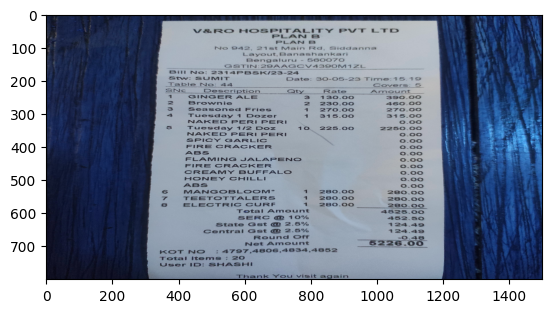

In [8]:
im_path= "./bill.jpg"
# read image from path
img = cv2.imread(im_path)
print(img.shape)

#img resize
img = cv2.resize(img,(1500,800))

# BGR format : BGR->RGB
print(img.shape)

plt.imshow(img)  #how our image would show
plt.show()

In [11]:
# 1 Remove the Noise
# 2 Edge Detection
# 3 Contour Extraction
# 4 Best Contour Selection
# 5 Project to the screen

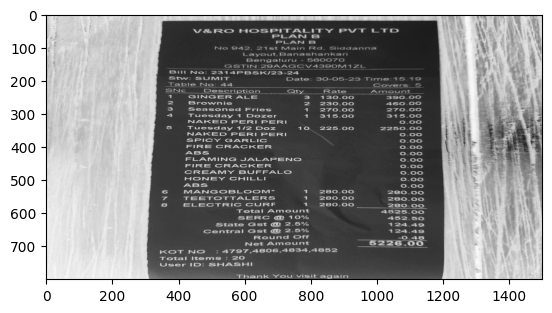

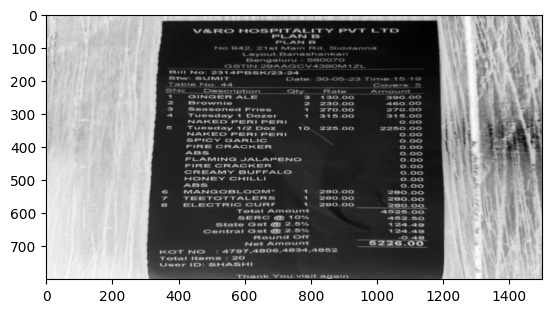

In [16]:
#1 remove the noise

originalimg = img.copy()
gray = cv2.cvtColor(originalimg, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap="binary" )
plt.show()

##1.1 Image Blurring

blurred = cv2.GaussianBlur(gray, (5,5), 0)
plt.imshow(blurred, cmap="binary")
plt.show()

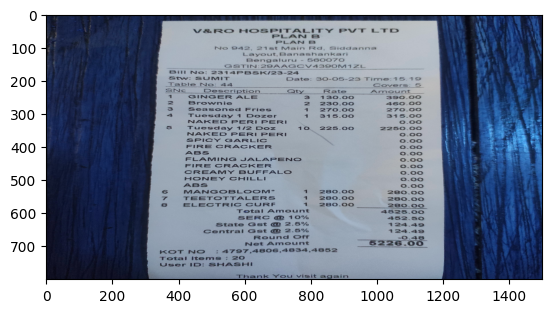

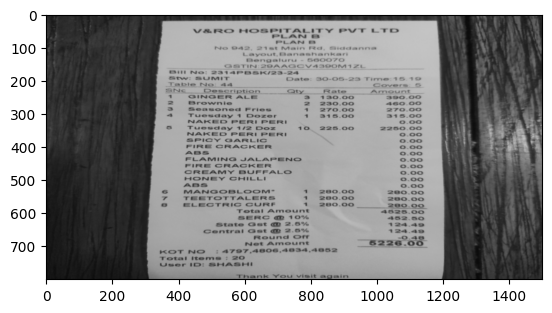

In [20]:
# converting the above blurred image to BGR (color format)

regenerated = cv2.cvtColor(blurred, cv2.COLOR_GRAY2BGR)
plt.imshow(originalimg)
plt.show()

plt.imshow(regenerated)
plt.show()